## Introduction to regression with neural networks

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split 

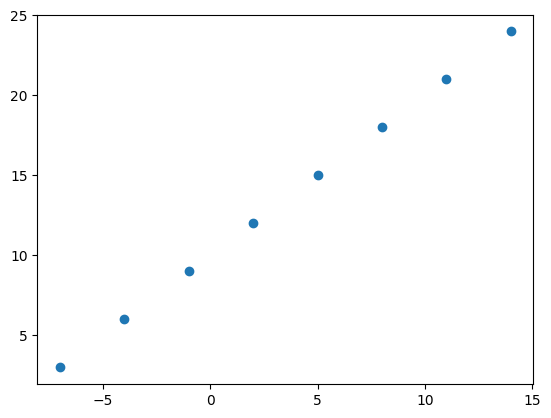

In [2]:
X =  np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
plt.scatter(X,y)

### Steps in modeling tensor flow
- Create a model - input and output layer aling with hidden layers
- Compiing a model - define the loss function with optimizer
- Fitting a model - let model try to find pattern

In [3]:
tf.random.set_seed(42)

# Prepare tensor inputs
tn_X = tf.constant(X,dtype=tf.float32)
tn_y = tf.constant(y,dtype=tf.float32)
print(tn_X)
print(tn_y)

# Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compiling a model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics=['mae'])


tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float32)
tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32)


In [12]:
tn_X,tf.expand_dims(tn_X, axis=-1),tn_y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Fit the model
# model.fit(tn_X,tn_y,epochs=5) # old code
model.fit(tf.expand_dims(tn_X, axis=-1), tn_y, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 7.3650 - mae: 7.3650
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 7.3594 - mae: 7.3594
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 7.3537 - mae: 7.3537
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 7.3481 - mae: 7.3481
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 7.3425 - mae: 7.3425
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 7.3369 - mae: 7.3369
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 7.3313 - mae: 7.3313
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 7.3256 - mae: 7.3256
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 7.3200 - mae: 7.3200
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 7.3144 - mae: 7.3144
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 7.3088 - mae: 7.3088
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 7.3031 - mae: 7.3031
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - lo

In [14]:
# Prediction
pred = np.array([14.0,17.0]).reshape(2, 1)
pred
print(model.predict(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[24.508472]
 [29.689573]]


### Improving our Model
- Creating a model - add more layers, increase no of hidden units, changed the activation function
- Compiling a model - Optimation function
- Fitting a model - increase epochs

#### By increasing number of epochs

In [15]:
# Fit the model
model.fit(tf.expand_dims(tn_X, axis=-1), tn_y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 7.2525 - mae: 7.2525
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 7.2469 - mae: 7.2469
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 7.2413 - mae: 7.2413
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 7.2356 - mae: 7.2356
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 7.2300 - mae: 7.2300
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 7.2244 - mae: 7.2244
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 7.2187 - mae: 7.2187
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 7.2131 - mae: 7.2131
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 7.2075 - mae: 7.2075
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 7.2019 - mae: 7.2019
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 7.1963 - mae: 7.1963
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 7.1906 - mae: 7.1906
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/

In [16]:
# Prediction
pred = np.array([14.0,17.0]).reshape(2, 1)
print(model.predict(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[25.258472]
 [30.439573]]


#### Improved by adding hiddnen layers

In [17]:
tf.random.set_seed(42)

# Prepare tensor inputs
tn_X = tf.constant(X,dtype=tf.float32)
tn_y = tf.constant(y,dtype=tf.float32)
print(tn_X)
print(tn_y)

# Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compiling a model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics=['mae'])

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float32)
tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32)


In [18]:
# Fit the model
model.fit(tf.expand_dims(tn_X, axis=-1), tn_y, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.4541 - mae: 12.4541
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 11.7930 - mae: 11.7930
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 11.1171 - mae: 11.1171
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.4207 - mae: 10.4207
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 9.7107 - mae: 9.7107
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 8.9746 - mae: 8.9746
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 8.1966 - mae: 8.1966
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 7.3705 - mae: 7.3705
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 6.4915 - mae: 6.4915
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 5.5502 - mae: 5.5502
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 4.5370 - mae: 4.5370
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 4.0619 - mae: 4.0619
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step -

In [19]:
# Prediction
pred = np.array([14.0,17.0]).reshape(2, 1)
print(model.predict(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
[[26.398718]
 [31.986359]]


#### Improving by chaningg the optimizer

In [20]:
tf.random.set_seed(42)

# Prepare tensor inputs
tn_X = tf.constant(X,dtype=tf.float32)
tn_y = tf.constant(y,dtype=tf.float32)
print(tn_X)
print(tn_y)

# Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# Compiling a model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # stochastic gradient descent
              metrics=['mae'])

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float32)
tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32)


In [21]:
# Fit the model
model.fit(tf.expand_dims(tn_X, axis=-1), tn_y, epochs=30)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.5403 - mae: 13.5403
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 12.8317 - mae: 12.8317
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 12.1308 - mae: 12.1308
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 11.4360 - mae: 11.4360
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 10.7457 - mae: 10.7457
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 10.0570 - mae: 10.0570
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 9.3667 - mae: 9.3667
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 8.6721 - mae: 8.6721
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 7.9705 - mae: 7.9705
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 7.2594 - mae: 7.2594
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 6.7704 - mae: 6.7704
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 6.8599 - mae: 6.8599
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step

In [22]:
# Prediction
pred = np.array([14.0,17.0]).reshape(2, 1)
print(model.predict(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[[25.988268]
 [30.963737]]


### Training & Testing Data

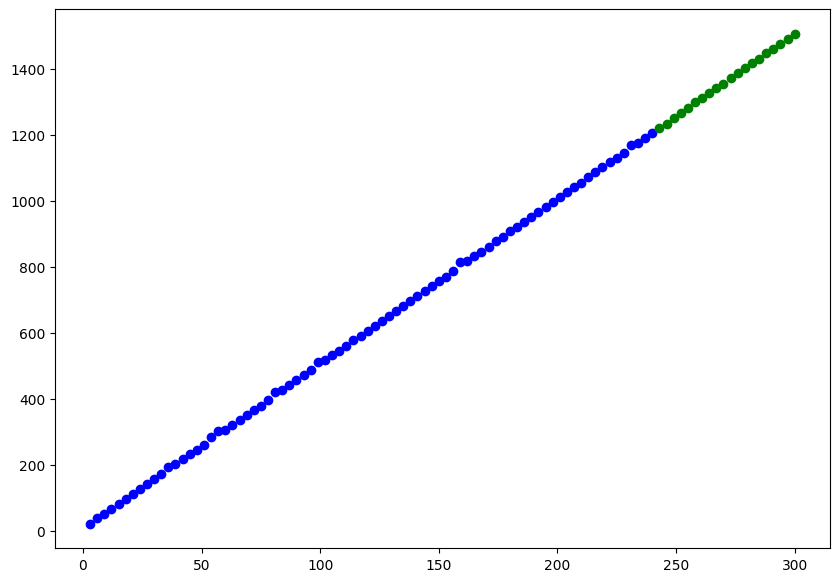

In [23]:
df = pd.read_csv('data_tensor_reg1.csv')
df.head()
df_train = df.loc[0:79]
df_test = df.loc[80:101]
plt.figure(figsize=(10, 7))
plt.scatter(df_train.x_value,df_train.y_value,c='b',label='Training Data')
plt.scatter(df_test.x_value,df_test.y_value,c='g',label='Testing Data')

# Convert into tensor
tn_X_train = tf.convert_to_tensor(df_train.x_value,dtype=tf.float32)
tn_y_train = tf.convert_to_tensor(df_train.y_value,dtype=tf.float32)

tn_X_test = tf.convert_to_tensor(df_test.x_value,dtype=tf.float32)
tn_y_test = tf.convert_to_tensor(df_test.y_value,dtype=tf.float32)

In [24]:
import graphviz
tf.random.set_seed(42)
# Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compiling a model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # stochastic gradient descent
              metrics=['mae'])

model.summary()
#plot_model(model=model)  ##-- need to install graphviz binary on windows


# Fit the model
model.fit(tf.expand_dims(tn_X_train, axis=-1), tn_y_train, epochs=100,verbose=0)



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


,x_value,y_value,y_predict
80,243,1222.00,1236.885376
81,246,1233.45,1252.065918
82,249,1252.00,1267.246582
83,252,1267.00,1282.427124
84,255,1282.00,1297.607544
85,258,1299.40,1312.788086
86,261,1312.00,1327.968750
87,264,1327.00,1343.149292
88,267,1342.00,1358.329712
89,270,1356.20,1373.510376


Evluation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - loss: 16.6632 - mae: 16.6632


[16.66315269470215, 16.66315269470215]

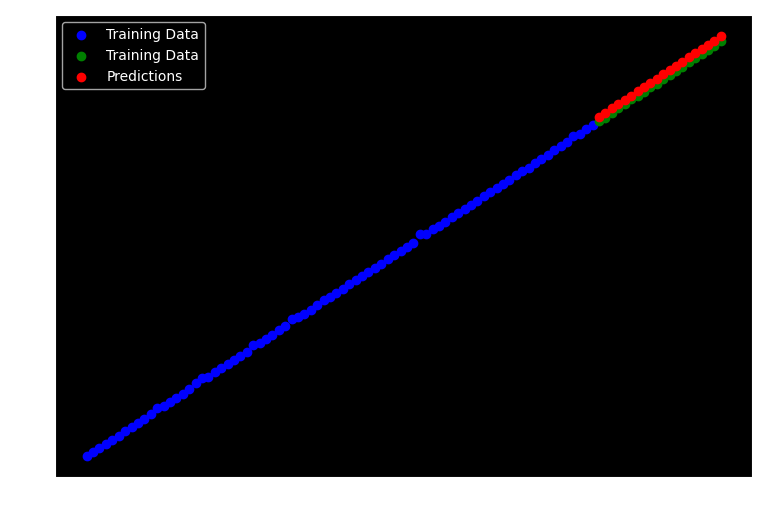

In [25]:
def plot_predictions(train_data,train_label,test_data,test_label,prediction,plot_only_pred=False):
    plt.figure(figsize=(9, 6))
    plt.style.use('dark_background')
    if not plot_only_pred:
        plt.scatter(train_data,train_label,c='b',label='Training Data')
    plt.scatter(test_data,test_label,c='g',label='Training Data')
    plt.scatter(test_data,prediction,c='r',label='Predictions')
    plt.legend()
    
# Prediction with test data
y_pred = model.predict(tn_X_test)

plot_predictions(df_train.x_value,df_train.y_value,df_test.x_value,df_test.y_value,y_pred)
df_compare = df_test.copy()
df_compare['y_predict'] = y_pred
display(df_compare)

# Model Evaluation
print('Evluation')
model.evaluate(tn_X_test,tn_y_test)
#plot_predictions(tn_X_train,tn_y_train,tn_X_test,tn_y_test,y_pred,plot_only_pred=True)

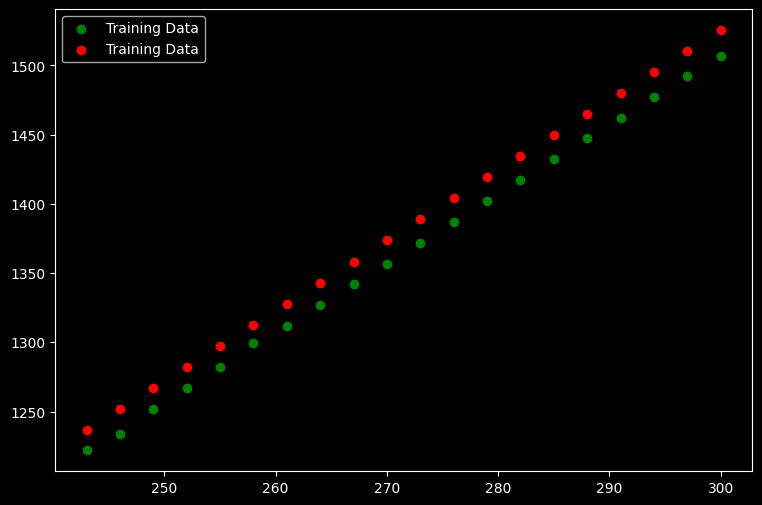

In [26]:
tn_y_pred = tf.constant(y_pred)
tn_y_pred = tf.squeeze(tn_y_pred)
tn_y_pred

plt.figure(figsize=(9, 6))
plt.style.use('dark_background')
plt.scatter(tn_X_test,tn_y_test,c='g',label='Training Data')
plt.scatter(tn_X_test,tn_y_pred,c='r',label='Training Data')
plt.legend()



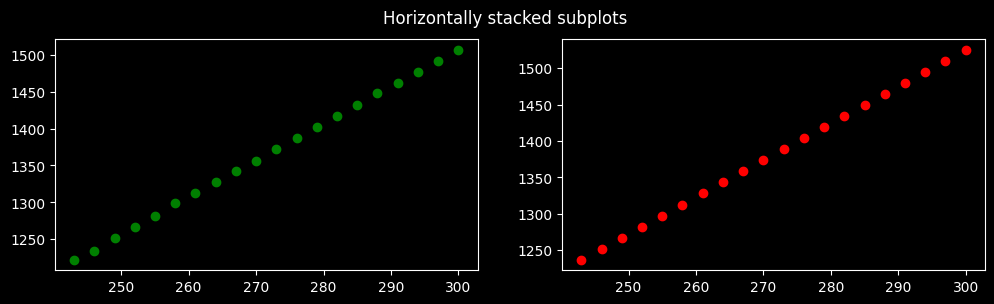

In [27]:
#plt.figure(figsize=(22, 6))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
fig.set_size_inches(12,3)
plt.style.use('dark_background')
ax1.scatter(tn_X_test,tn_y_test,c='g',label='Training Data')
ax2.scatter(tn_X_test,tn_y_pred,c='r',label='Training Data')

In [28]:
# 7.420331001281738, 7.420331001281738 same as evaluate method
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError
mae_loss = MeanAbsoluteError()
mse_loss = MeanSquaredError()
 
mae_loss(tn_y_test, tn_y_pred).numpy(),mse_loss(tn_y_test, tn_y_pred).numpy()

(16.663153, 279.28882)